# Proyecto de clasificación utilizando CNN - MNIST

### Datos del proyecto

Dataset: MNIST, a través de Keras

Descripción del dataset: 60000 imágenes en blanco y negro de números manuscritos

Objetivo: utilizar redes neuronales convolucionales para lograr clasificar imágenes de números manuscritos

Tipo de problema: clasificación multiclase

In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Importar dataset
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

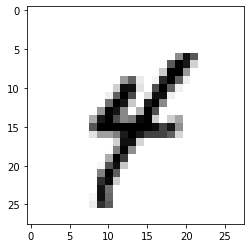

In [10]:
plt.imshow(X_train[61], cmap="binary")

In [11]:
# etiqueta correspondiente
y_train[61]

4

In [12]:
from tensorflow.keras.utils import to_categorical

In [18]:
#encodear la etiqueta en columnas binarias
y_train_encodeado = to_categorical(y_train, num_classes = 10)

In [19]:
y_test_encodeado = to_categorical(y_test, num_classes = 10)

In [20]:
print(X_train.max())
print("\n")
print(X_train.min())

255


0


In [22]:
# Dado que sabemos que el máximo va a ser 255 y el mínimo 0, podemos normalizar los X dividiento / 255
X_train = X_train/255
X_test = X_test/255

In [24]:
# batch size, ancho, largo, colores
X_train = X_train.reshape(60000, 28, 28, 1)

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
modelo = Sequential()

modelo.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation="relu"))
modelo.add(MaxPool2D(pool_size=(2,2)))

modelo.add(Flatten())

modelo.add(Dense(128, activation="relu"))

# OUTPUT

modelo.add(Dense(10, activation="softmax"))

modelo.compile(loss="categorical_crossentropy", optimizer="adam")

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [37]:
modelo.fit(X_train, y_train_encodeado, epochs=25, validation_data=(X_test, y_test_encodeado), callbacks=early_stop)

Epoch 1/25
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1304 - val_loss: 0.0631
Epoch 2/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0447 - val_loss: 0.0426
Epoch 3/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0272 - val_loss: 0.0348
Epoch 4/25
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0186 - val_loss: 0.0419
Epoch 5/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0131 - val_loss: 0.0418


In [38]:
losses = pd.DataFrame(modelo.history.history)

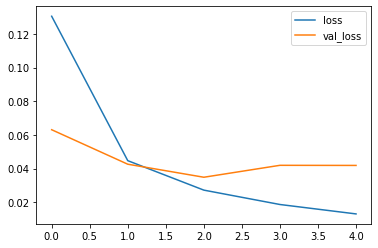

In [39]:
losses.plot()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
predictions = modelo.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



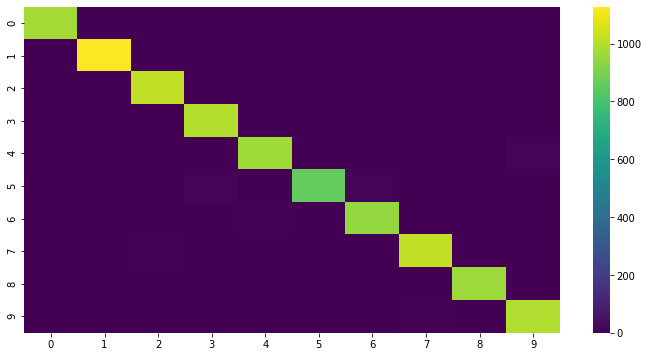

In [45]:
matriz = confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,6))
sns.heatmap(matriz,cmap="viridis")